#  Assignment Week 11 - 12 Term Project Milestone- 5  Merging the Data and Storing in a Database/Visualizing Data Digital Currency 


''' 
 
Name : Karthikeyan Chellamuthu

Date : 06-04-2022

'''

As part of previous milestones, we have read various digital currency  dataset from difference sources like csv, web and API, and performed various transformations and store the output as csv files. Some of the transformations performed during previous milestones are mentioned below. 

Formatted Columns <br>
Duplicate check <br>
Renaming the columns with more meaningful names <br> 
Null or missing value checks <br>
Updating proper datatypes for each column <br>

# Milestone -5 

For this milestone, we will create the pandas dataframes for all the csv files created in the previous milestones and load the data into SQLite database. Once the data is loaded into SQLite tables, we will access and combine the data using SQLite libaries and create various visualizations using python matplot library.

In [1]:
# Importing all the python libraries required for this assignment
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Reading data from csv files stored as part of previous milestones

# Reading the data from csv files into pandas dataframe

df_webdata = pd.read_csv("Crypto_Currencies_Metadata.csv")
df_apidata = pd.read_csv("Crypto_Currencies_api_dataset.csv")
df_csvdata = pd.read_csv("Crypto_currencies_price.csv")


In [5]:
# Step 2: Formatting the column names
# Printing the column names for each of the dataframe

print("The column names present in csv dataset:")
print(df_csvdata.columns)

print("The column names present in web dataset:")
print(df_webdata.columns)

print("The column names present in API dataset:")
print(df_apidata.columns)

The column names present in csv dataset:
Index(['Trading_date', 'Open_price', 'High_price', 'Low_price', 'Close_price',
       'Volume', 'Symbol', 'Description', 'Month_Year', 'Month', 'Year',
       'price_percent_day', 'price_fluctuation_day'],
      dtype='object')
The column names present in web dataset:
Index(['Currency_Name', 'List_of_Symbols', 'Founder(s)', 'Hash_Algorithm',
       'Implemented_Language', 'Consensus mechanism', 'Description',
       'Release_Year', 'Symbol', 'Active_Flag'],
      dtype='object')
The column names present in API dataset:
Index(['status_timestamp', 'crypto_id', 'crypto_name', 'symbol', 'crypto_slug',
       'num_market_pairs', 'found_date', 'tags', 'maximum_num_supply',
       'circulating_supply', 'total_num_supply', 'active_flag', 'platform',
       'crypto_cmc_rank', 'is_fiat', 'circulating_supply.1', 'market_cap',
       'last_update_dt', 'usd_price', 'usd_volume_24h',
       'usd_volume_change_24h', 'usd_percent_change_1h',
       'usd_percent

In [6]:
# Function to replace space and dot with underscores

def columnFormat(df):
    '''Replaces spaces and dots with underscores in the column names of a DataFrame'''
    newCols = []
    for c in df.columns:
        newCols.append(c.replace(' ', '_').replace('.','_'))
    df.columns = newCols
    print(f"New column names:\n{df.columns}")  

In [7]:
# Calling the function to format the column names

columnFormat(df_csvdata)
columnFormat(df_webdata)
columnFormat(df_apidata)

New column names:
Index(['Trading_date', 'Open_price', 'High_price', 'Low_price', 'Close_price',
       'Volume', 'Symbol', 'Description', 'Month_Year', 'Month', 'Year',
       'price_percent_day', 'price_fluctuation_day'],
      dtype='object')
New column names:
Index(['Currency_Name', 'List_of_Symbols', 'Founder(s)', 'Hash_Algorithm',
       'Implemented_Language', 'Consensus_mechanism', 'Description',
       'Release_Year', 'Symbol', 'Active_Flag'],
      dtype='object')
New column names:
Index(['status_timestamp', 'crypto_id', 'crypto_name', 'symbol', 'crypto_slug',
       'num_market_pairs', 'found_date', 'tags', 'maximum_num_supply',
       'circulating_supply', 'total_num_supply', 'active_flag', 'platform',
       'crypto_cmc_rank', 'is_fiat', 'circulating_supply_1', 'market_cap',
       'last_update_dt', 'usd_price', 'usd_volume_24h',
       'usd_volume_change_24h', 'usd_percent_change_1h',
       'usd_percent_change_24h', 'usd_percent_change_7d',
       'usd_percent_change_30d

In [14]:
# Step 3: Additional transformation

# We could see api data set has a column "tags" which may not be required and also we can remove the column and remove duplicates from the dataset

df_apidata.drop('tags', axis=1, inplace=True)

In [15]:
# display the column names

df_apidata.columns

Index(['status_timestamp', 'crypto_id', 'crypto_name', 'symbol', 'crypto_slug',
       'num_market_pairs', 'found_date', 'maximum_num_supply',
       'circulating_supply', 'total_num_supply', 'active_flag', 'platform',
       'crypto_cmc_rank', 'is_fiat', 'circulating_supply_1', 'market_cap',
       'last_update_dt', 'usd_price', 'usd_volume_24h',
       'usd_volume_change_24h', 'usd_percent_change_1h',
       'usd_percent_change_24h', 'usd_percent_change_7d',
       'usd_percent_change_30d', 'usd_percent_change_60d',
       'usd_percent_change_90d', 'usd_market_cap', 'usd_market_cap_dominance',
       'usd_fully_diluted_market_cap', 'usd_last_updated_tm'],
      dtype='object')

In [16]:
# We could see the column "tags" has been removed from the dataframe Calculating the count of records present in API dataset dataframe

df_apidata.shape

(110, 30)

In [18]:
# Removing the duplicates from the dataframe

df_apidata.drop_duplicates(inplace = True)

In [20]:
# Showing record count and sample records from the dataframe after removing duplicates

print("Total number of rows and columns present in api dataframe: {}".format(df_apidata.shape))

Total number of rows and columns present in the dataframe: (9, 30)


In [25]:
# Calculating the count of records for remaining dataframes

print("Total number of rows and columns present in csv dataframe: {}".format(df_csvdata.shape))
print("Total number of rows and columns present in web dataframe: {}".format(df_webdata.shape))

Total number of rows and columns present in csv dataframe: (13149, 13)
Total number of rows and columns present in web dataframe: (40, 10)


In [32]:
# Step 4: Loading dataframe into SQLite database
# loading all the dataframes into crypto database

with sqlite3.connect('crypto.db') as conn:
    cursor = conn.cursor()
    df_csvdata.to_sql('crypto_csv_data', conn, if_exists='replace', index=False)
    df_webdata.to_sql('crypto_web_data', conn, if_exists='replace', index=False)
    df_apidata.to_sql('crypto_api_data', conn, if_exists='replace', index=False)

In [35]:
# Getting the list of tables and store it to list

result = conn.execute('''SELECT name FROM sqlite_master WHERE type='table';''')
tableList = []
for name in result:
    print(name[0])
    tableList.append(name[0])

crypto_csv_data
crypto_web_data
crypto_api_data


In [36]:
# Step 5: Data validation for SQLite tables
# Check out the first few rows of each table and Creating a function for this step

def df_head(tablename, nRows=5):
    '''Prints the first n rows of the table specified'''
    cursor.execute(f'''SELECT * FROM {tablename}''')
    for row in cursor.fetchall()[:nRows]:
        print(row)

In [37]:
# Calling the function for all the tables present in the tableList and printing 3 records

for i in tableList:
    print(f"Table: '{i}' - ")
    df_head(i, 3)
    print()

Table: 'crypto_csv_data' - 
('2018-01-01', 0.718847, 0.730051, 0.671941, 0.728657, 150186000, 'ADA', 'Cardano', '2018-01', 1, 2018, 1.36, 8.65)
('2018-01-02', 0.724676, 0.794646, 0.697856, 0.782587, 289712000, 'ADA', 'Cardano', '2018-01', 1, 2018, 7.99, 13.87)
('2018-01-03', 0.779681, 1.08567, 0.778578, 1.07966, 657398016, 'ADA', 'Cardano', '2018-01', 1, 2018, 38.47, 39.44)

Table: 'crypto_web_data' - 
('Bitcoin', 'BTC, XBT, ₿', 'Satoshi Nakamoto', 'SHA-256d', 'C++', 'PoW', 'The first and most widely used decentralized ledger currency,[7] with the highest market capitalization.[8]', 2009, 'BTC', 'Y')
('Litecoin', 'LTC, Ł', 'Charlie Lee', 'Scrypt', 'C++', 'PoW', 'One of the first cryptocurrencies to use scrypt as a hashing algorithm.', 2011, 'LTC', 'Y')
('Namecoin', 'NMC', 'Vincent Durham', 'SHA-256d', 'C++', 'PoW', 'Also acts as an alternative, decentralized DNS.', 2011, 'NMC', 'Y')

Table: 'crypto_api_data' - 
('2022-02-16 01:49:28.198000+00:00', 2010, 'Cardano', 'ADA', 'cardano', 364

In [38]:
# Calculating the count of records present in the table

def recordcount(tablename):
    '''Prints the count of rows present in the dataframe'''
    r = cursor.execute(f'''SELECT count(*) FROM {tablename}''')
    for row in r:
        print("Count of records present in the table {}: {}".format(tablename, row[0]))

In [39]:
for i in tableList:
    print(f"Table: '{i}' ")
    recordcount(i)

Table: 'crypto_csv_data' 
Count of records present in the table crypto_csv_data: 13149
Table: 'crypto_web_data' 
Count of records present in the table crypto_web_data: 40
Table: 'crypto_api_data' 
Count of records present in the table crypto_api_data: 9


In [47]:
# Step 6: Join the datasets together into 1 dataset.
#  We see the record count present in the table matches with the count of records present in the dataframe.  Also,We see "symbol" column is common across all the dataset and Joining the dataframe based on symbol

sql = """create table cryptocurrency as 
         SELECT * from crypto_csv_data csv
         inner join crypto_web_data web
         on csv.symbol = web.symbol
         inner join crypto_api_data api
         on csv.symbol = api.symbol
         ;
    """
cursor.execute(sql)
#combinedData = pd.read_sql_query(sql,conn)

In [50]:
# Displaying sample records from cryptocurrency

df_head('cryptocurrency', 3)

('2018-01-01', 0.718847, 0.730051, 0.671941, 0.728657, 150186000, 'ADA', 'Cardano', '2018-01', 1, 2018, 1.36, 8.65, 'Cardano', 'ADA, ₳', 'Charles Hoskinson', 'Ouroboros, PoS Algorithm', 'Haskell', 'PoS', 'A proof-of-stake blockchain platform: developed through evidence-based methods and peer-reviewed research.[63][64][65]', 2017, 'ADA', 'Y', '2022-02-16 01:49:28.198000+00:00', 2010, 'Cardano', 'ADA', 'cardano', 364, '2017-10-01 00:00:00+00:00', 45000000000.0, 33613420243.99, 34105094650.087, 1, None, 7, 0, None, None, '2022-02-16 01:48:00+00:00', 1.0990844571343013, 1308453639.4361248, 9.3532, -0.52848559, 2.34419718, -6.82780106, -21.00901256, -9.37611845, -41.95378512, 36943987741.292885, 1.8588, 49458800571.04, '2022-02-16 01:48:00+00:00')
('2018-01-02', 0.724676, 0.794646, 0.697856, 0.782587, 289712000, 'ADA', 'Cardano', '2018-01', 1, 2018, 7.99, 13.87, 'Cardano', 'ADA, ₳', 'Charles Hoskinson', 'Ouroboros, PoS Algorithm', 'Haskell', 'PoS', 'A proof-of-stake blockchain platform: dev

In [51]:
# Creating dataframe from cryptocurrency table

sql = "select * from cryptocurrency;"
combinedData = pd.read_sql_query(sql,conn)

In [52]:
# Displaying few records from combinedData dataframe

combinedData.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol,Description,Month_Year,Month,...,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_market_cap,usd_market_cap_dominance,usd_fully_diluted_market_cap,usd_last_updated_tm
0,2018-01-01,0.718847,0.730051,0.671941,0.728657,150186000,ADA,Cardano,2018-01,1,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
1,2018-01-02,0.724676,0.794646,0.697856,0.782587,289712000,ADA,Cardano,2018-01,1,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
2,2018-01-03,0.779681,1.085670,0.778578,1.079660,657398016,ADA,Cardano,2018-01,1,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
3,2018-01-04,1.094030,1.327210,1.037650,1.114120,593430016,ADA,Cardano,2018-01,1,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00
4,2018-01-05,1.171150,1.252420,0.903503,0.999559,508100000,ADA,Cardano,2018-01,1,...,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,3.694399e+10,1.8588,4.945880e+10,2022-02-16 01:48:00+00:00


In [54]:
# Displaying the columns present in the dataframe

combinedData.columns

Index(['Trading_date', 'Open_price', 'High_price', 'Low_price', 'Close_price',
       'Volume', 'Symbol', 'Description', 'Month_Year', 'Month', 'Year',
       'price_percent_day', 'price_fluctuation_day', 'Currency_Name',
       'List_of_Symbols', 'Founder(s)', 'Hash_Algorithm',
       'Implemented_Language', 'Consensus_mechanism', 'Description:1',
       'Release_Year', 'Symbol:1', 'Active_Flag', 'status_timestamp',
       'crypto_id', 'crypto_name', 'symbol:2', 'crypto_slug',
       'num_market_pairs', 'found_date', 'maximum_num_supply',
       'circulating_supply', 'total_num_supply', 'active_flag:1', 'platform',
       'crypto_cmc_rank', 'is_fiat', 'circulating_supply_1', 'market_cap',
       'last_update_dt', 'usd_price', 'usd_volume_24h',
       'usd_volume_change_24h', 'usd_percent_change_1h',
       'usd_percent_change_24h', 'usd_percent_change_7d',
       'usd_percent_change_30d', 'usd_percent_change_60d',
       'usd_percent_change_90d', 'usd_market_cap', 'usd_market_cap_domi

In [53]:
# Showing the total number of rows and columns

print("Total number of rows and columns present in the combined data: {}".format(combinedData.shape))

Total number of rows and columns present in the combined data: (11688, 53)


'''The total number of records has been reduced to 11688. This is because I have used inner join rather than outer joins. Inner join will give only matching records to the output. However, the number of columns has been increased as the output contains columns from all the tables'''

In [59]:
# Validating the symbol field present in dataset

crypto = []
for row in cursor.execute("select distinct symbol from cryptocurrency"):
    crypto.append(row[0])
print("Digital Currencies present in the combined dataset")
print(crypto)
print("\nTotal number of Digital Currencies present in the combined dataset: {}".format(len(crypto)))

Cryptocurrencies present in the combined dataset
['ADA', 'BTC', 'DOGE', 'ETC', 'ETH', 'LTC', 'NEO', 'USDT']

Total number of cryptocurrencies present in the combined dataset: 8


In [73]:
crypto_lang = []
for row in cursor.execute("select distinct Implemented_Language from cryptocurrency"):
    crypto_lang.append(row[0])
print("Types of Implemented Lanuages")
print(crypto_lang)
print("\nTotal number of implemented languages: {}".format(len(crypto_lang)))

Types of Implemented Lanuages
['Haskell', 'C++', None, 'C++, Go', 'C#']

Total number of implemented languages: 5


In [125]:
# Creating another table called crypto_price having web and API datasets alone

sql = """create table crypto_price as 
         SELECT * from crypto_web_data web
         left outer join crypto_api_data api 
         on api.symbol = web.symbol
         ;
    """
cursor.execute(sql)
#combinedData = pd.read_sql_query(sql,conn)

In [126]:
# Displaying sample records

df_head('crypto_price', 3)

('Bitcoin', 'BTC, XBT, ₿', 'Satoshi Nakamoto', 'SHA-256d', 'C++', 'PoW', 'The first and most widely used decentralized ledger currency,[7] with the highest market capitalization.[8]', 2009, 'BTC', 'Y', '2022-02-16 01:49:28.636000+00:00', 1, 'Bitcoin', 'BTC', 'bitcoin', 9152, '2013-04-28 00:00:00+00:00', 21000000.0, 18959431.0, 18959431.0, 1, None, 1, 0, None, None, '2022-02-16 01:48:00+00:00', 44035.09941170733, 22241330229.810623, 2.5446, -0.44794852, 1.35751896, -0.05794646, 2.64748102, -4.06719124, -27.3678098, 834880428874.4056, 42.0145, 924737087645.85, '2022-02-16 01:48:00+00:00')
('Litecoin', 'LTC, Ł', 'Charlie Lee', 'Scrypt', 'C++', 'PoW', 'One of the first cryptocurrencies to use scrypt as a hashing algorithm.', 2011, 'LTC', 'Y', '2022-02-16 01:49:29.144000+00:00', 2, 'Litecoin', 'LTC', 'litecoin', 733, '2013-04-28 00:00:00+00:00', 84000000.0, 69647781.8613374, 84000000.0, 1, None, 20, 0, None, None, '2022-02-16 01:48:00+00:00', 129.77413264530236, 763697480.2316202, 5.844, -0

In [131]:
# Creating dataframe from crypto_price table

sql = "select * from crypto_price where usd_market_cap is not null;"
crypto_price_df = pd.read_sql_query(sql,conn)

In [132]:
# Displaying sample records using head command

crypto_price_df.head(5)

,Currency_Name,List_of_Symbols,Founder(s),Hash_Algorithm,Implemented_Language,Consensus_mechanism,Description,Release_Year,Symbol,Active_Flag,...,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_market_cap,usd_market_cap_dominance,usd_fully_diluted_market_cap,usd_last_updated_tm
0,Bitcoin,"BTC, XBT, ₿",Satoshi Nakamoto,SHA-256d,C++,PoW,The first and most widely used decentralized l...,2009,BTC,Y,...,-0.447949,1.357519,-0.057946,2.647481,-4.067191,-27.367810,8.348804e+11,42.0145,9.247371e+11,2022-02-16 01:48:00+00:00
1,Litecoin,"LTC, Ł",Charlie Lee,Scrypt,C++,PoW,One of the first cryptocurrencies to use scryp...,2011,LTC,Y,...,-0.531227,1.628185,-3.478828,-11.299757,-10.124114,-43.491015,9.038480e+09,0.4546,1.090103e+10,2022-02-16 01:48:00+00:00
2,Dogecoin,"DOGE, XDG, Ð",Jackson Palmer& Billy Markus,Scrypt,C++,PoW,Based on the Doge internet meme.,2013,DOGE,Y,...,-0.312957,1.055212,-4.818581,-14.673491,-10.491055,-37.418471,1.992684e+10,1.0022,1.992684e+10,2022-02-16 01:48:00+00:00
3,NEO,NEO,Da Hongfei & Erik Zhang,SHA-256 & RIPEMD160,C#,dBFT,"China based cryptocurrency, formerly ANT Share...",2014,NEO,Y,...,-0.953333,3.074039,-2.475976,-9.289625,-10.668464,-48.226168,1.587900e+09,0.0799,2.251101e+09,2022-02-16 01:48:00+00:00
4,Ethereum,"ETH, Ξ",Vitalik Buterin,Ethash,"C++, Go","PoW, PoS",Supports Turing-complete smart contracts.,2015,ETH,Y,...,-0.508922,4.516551,0.987793,-5.295658,-17.784663,-27.178876,3.761311e+11,18.9249,3.761311e+11,2022-02-16 01:48:00+00:00


In [133]:
# Displaying count and columns

print("Columns present in the dataframe")
print(crypto_price_df.columns)
print("Total number of rows and columns present in the dataframe: {}".format(crypto_price_df.shape))

Columns present in the dataframe
Index(['Currency_Name', 'List_of_Symbols', 'Founder(s)', 'Hash_Algorithm',
       'Implemented_Language', 'Consensus_mechanism', 'Description',
       'Release_Year', 'Symbol', 'Active_Flag', 'status_timestamp',
       'crypto_id', 'crypto_name', 'symbol:1', 'crypto_slug',
       'num_market_pairs', 'found_date', 'maximum_num_supply',
       'circulating_supply', 'total_num_supply', 'active_flag:1', 'platform',
       'crypto_cmc_rank', 'is_fiat', 'circulating_supply_1', 'market_cap',
       'last_update_dt', 'usd_price', 'usd_volume_24h',
       'usd_volume_change_24h', 'usd_percent_change_1h',
       'usd_percent_change_24h', 'usd_percent_change_7d',
       'usd_percent_change_30d', 'usd_percent_change_60d',
       'usd_percent_change_90d', 'usd_market_cap', 'usd_market_cap_dominance',
       'usd_fully_diluted_market_cap', 'usd_last_updated_tm'],
      dtype='object')
Total number of rows and columns present in the dataframe: (8, 40)


In [78]:
# Step 7: Creating a table for the combined dataset
# Selecting the columns required for pictorial representation

sql = """select Symbol, currency_name, Trading_Date, Month_Year, Month, Year, 
         Open_price, High_price, Low_price, Close_price,
         price_percent_day, price_fluctuation_day, Hash_Algorithm,
         Implemented_Language, Release_Year, usd_volume_24h, 
         usd_percent_change_1h, usd_percent_change_24h, usd_percent_change_7d,
         usd_percent_change_30d, usd_percent_change_60d,
         usd_percent_change_90d, crypto_cmc_rank from cryptocurrency;
    """
crypto_df = pd.read_sql_query(sql,conn)

In [79]:
# Printing the values from the dataframe

crypto_df.head()

,Symbol,Currency_Name,Trading_date,Month_Year,Month,Year,Open_price,High_price,Low_price,Close_price,...,Implemented_Language,Release_Year,usd_volume_24h,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,crypto_cmc_rank
0,ADA,Cardano,2018-01-01,2018-01,1,2018,0.718847,0.730051,0.671941,0.728657,...,Haskell,2017,1.308454e+09,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,7
1,ADA,Cardano,2018-01-02,2018-01,1,2018,0.724676,0.794646,0.697856,0.782587,...,Haskell,2017,1.308454e+09,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,7
2,ADA,Cardano,2018-01-03,2018-01,1,2018,0.779681,1.085670,0.778578,1.079660,...,Haskell,2017,1.308454e+09,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,7
3,ADA,Cardano,2018-01-04,2018-01,1,2018,1.094030,1.327210,1.037650,1.114120,...,Haskell,2017,1.308454e+09,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,7
4,ADA,Cardano,2018-01-05,2018-01,1,2018,1.171150,1.252420,0.903503,0.999559,...,Haskell,2017,1.308454e+09,-0.528486,2.344197,-6.827801,-21.009013,-9.376118,-41.953785,7


In [80]:
# Number of rows and columns present in the dataframe

crypto_df.shape

(11688, 23)

In [81]:
# Printing the columns of the dataframe

crypto_df.columns

Index(['Symbol', 'Currency_Name', 'Trading_date', 'Month_Year', 'Month',
       'Year', 'Open_price', 'High_price', 'Low_price', 'Close_price',
       'price_percent_day', 'price_fluctuation_day', 'Hash_Algorithm',
       'Implemented_Language', 'Release_Year', 'usd_volume_24h',
       'usd_percent_change_1h', 'usd_percent_change_24h',
       'usd_percent_change_7d', 'usd_percent_change_30d',
       'usd_percent_change_60d', 'usd_percent_change_90d', 'crypto_cmc_rank'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ADA'}>,
        <AxesSubplot:title={'center':'BTC'}>,
        <AxesSubplot:title={'center':'DOGE'}>],
       [<AxesSubplot:title={'center':'ETC'}>,
        <AxesSubplot:title={'center':'ETH'}>,
        <AxesSubplot:title={'center':'LTC'}>],
       [<AxesSubplot:title={'center':'NEO'}>,
        <AxesSubplot:title={'center':'USDT'}>, <AxesSubplot:>]],
      dtype=object)

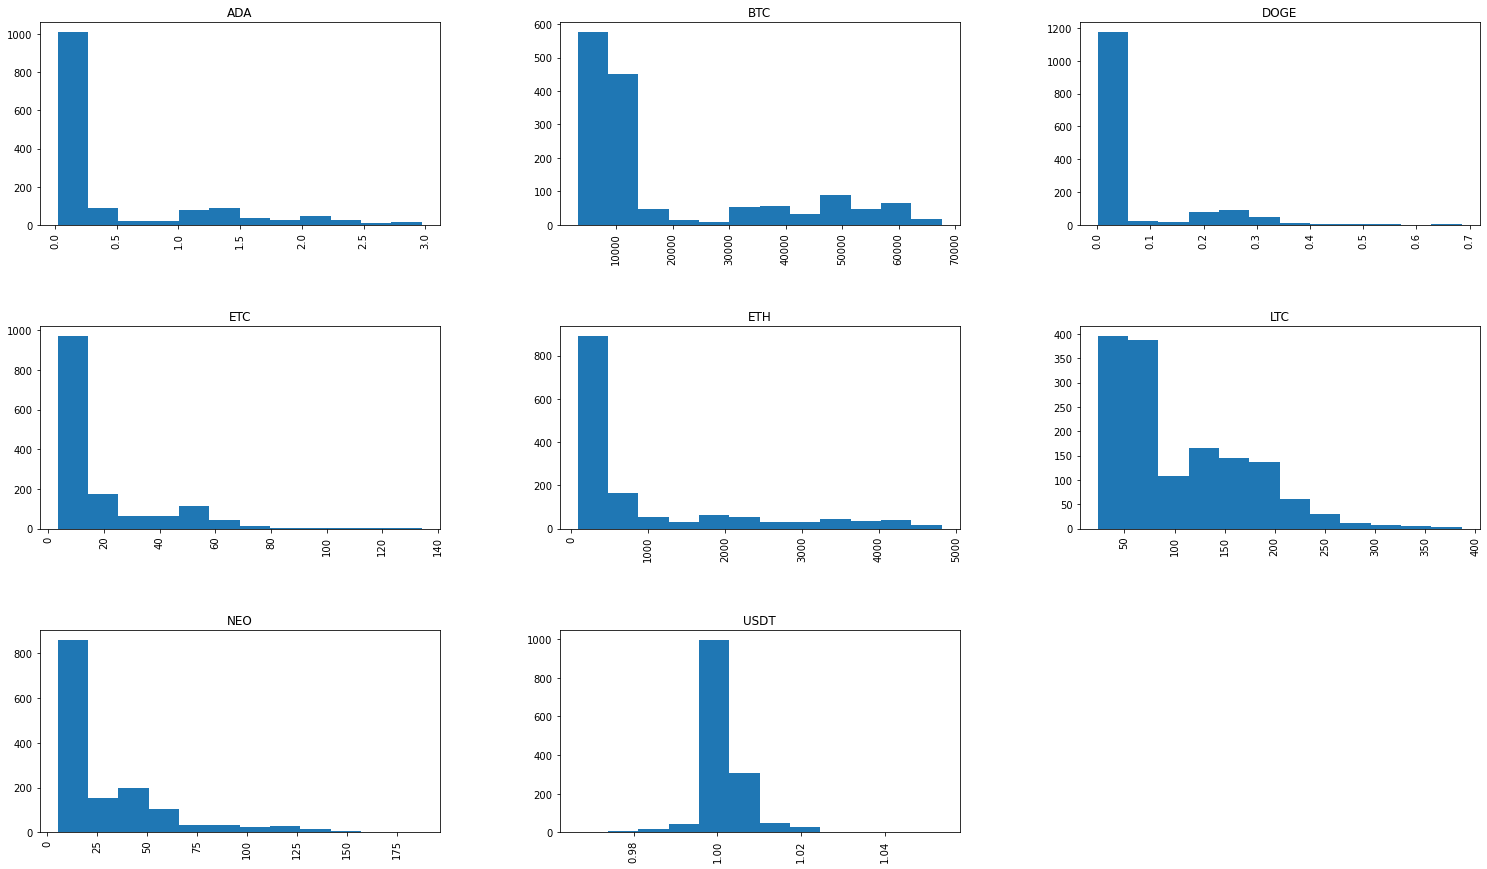

In [82]:
# Step 8: Histograms -Pictorial representation of the data
# Histograms and line chart to analyze the closing price for all the Digital Currencies and Creating histograms for closing price for each cryptocurrency

crypto_df.hist(by='Symbol', column='Close_price',figsize=[25,15], bins=12)

'''From the histograms created for closing price of all the Digital Currencies shown above, we could clearly understand the closing price for all the Digital Currencies are positively skewed except Tether (USDT) which is having normal distribution (no skew).'''

array([[<AxesSubplot:title={'center':'ADA'}>,
        <AxesSubplot:title={'center':'BTC'}>,
        <AxesSubplot:title={'center':'DOGE'}>],
       [<AxesSubplot:title={'center':'ETC'}>,
        <AxesSubplot:title={'center':'ETH'}>,
        <AxesSubplot:title={'center':'LTC'}>],
       [<AxesSubplot:title={'center':'NEO'}>,
        <AxesSubplot:title={'center':'USDT'}>, <AxesSubplot:>]],
      dtype=object)

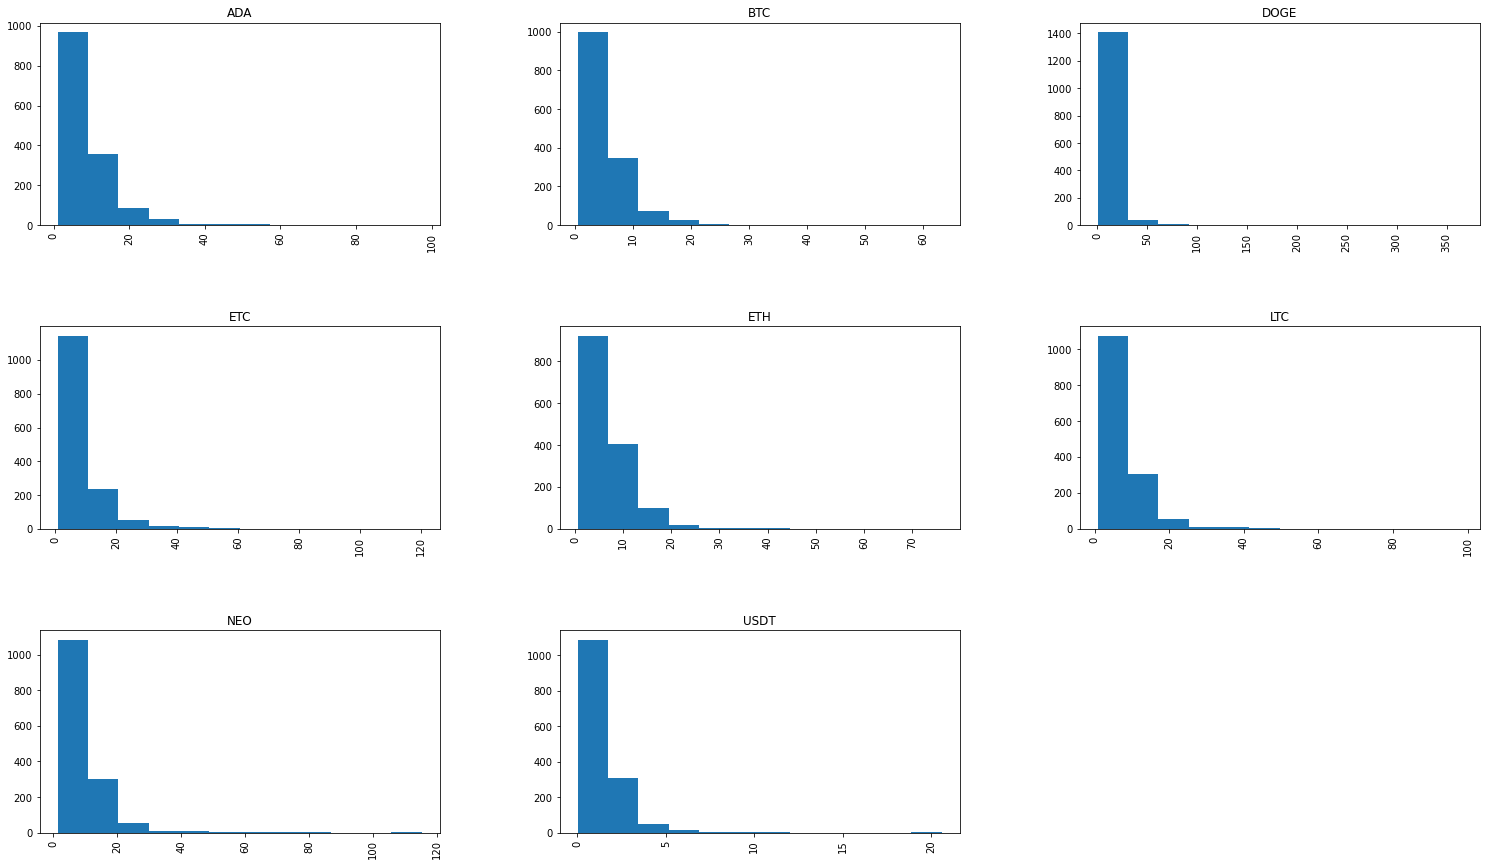

In [83]:
# Creating histograms for price fluctuation for all the Digital Currencies present in the dataset

crypto_df.hist(by='Symbol', column='price_fluctuation_day', figsize=[25,15], bins=12)

''' From the histograms created for price fluctuation of all the Digital Currencies shown above, we could clearly understand the price fluctuation for a day for all the Digital Currencies are also positively skewed.'''

In [101]:
# Candle Stick Charts
# Importing necessary libraries required for candlestick chart

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates

In [99]:
# Defining the style to be used for the plot

plt.style.use('seaborn-darkgrid')

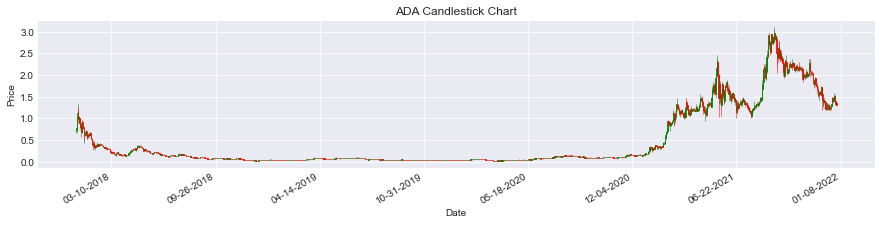

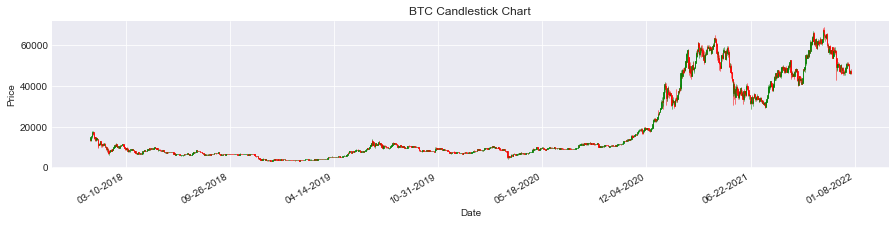

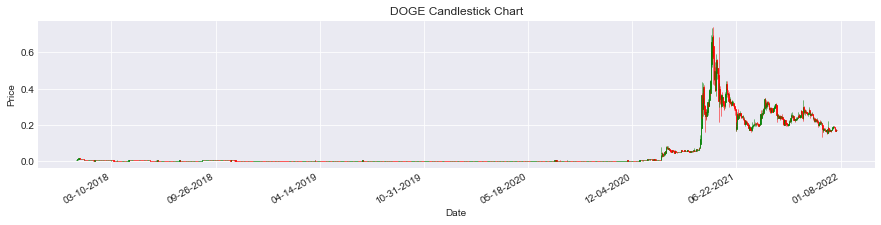

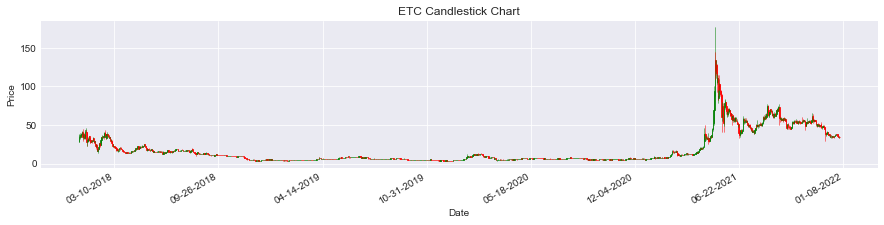

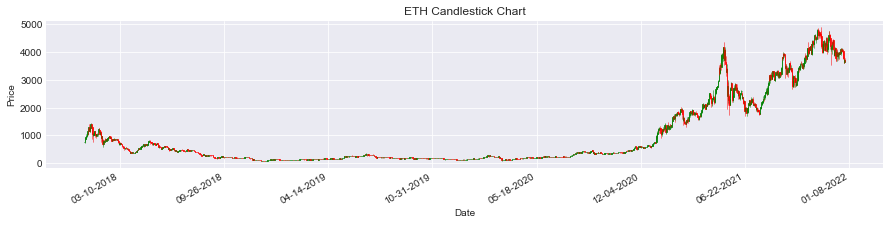

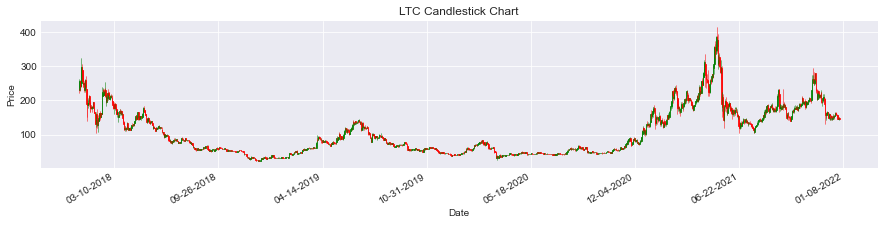

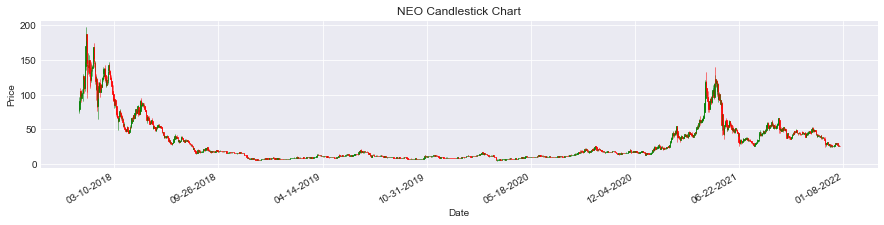

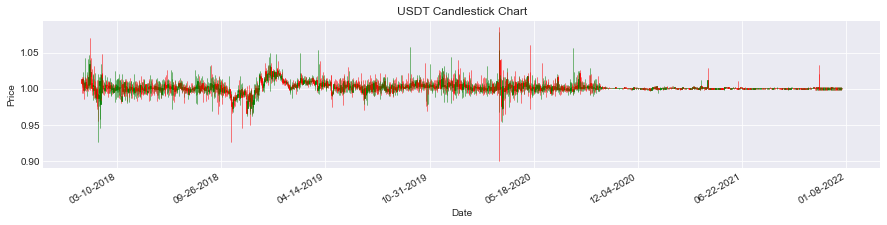

In [106]:
# Extracting the data for major Digital Currencies given in the below link and create candlestick chart and Looping through the crypto list and plot candlestick chart for all the crypto currencies for 3 years of data

for c in crypto:
    crypto_sub_df = crypto_df[crypto_df.Symbol == c]
    
    # Extracting Data for plotting
    df = crypto_sub_df.loc[:, ['Trading_date', 'Open_price', 'High_price', 'Low_price', 'Close_price']]
    df['Trading_date'] = mpdates.date2num(df['Trading_date'])
    
    # creating Subplots
    fig, ax = plt.subplots()

    fig.set_figheight(3)
    fig.set_figwidth(15)
 
    # plotting the data
    candlestick_ohlc(ax, df.values, width = 1,
                 colorup = 'green', colordown = 'red',
                 alpha = 0.8)
 
    # allow grid
    ax.grid(True)
 
    # Setting labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
 
    # setting title
    plt.title(c + ' Candlestick Chart')
 
    # Formatting Date
    date_format = mpdates.DateFormatter('%m-%d-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
 
    # show the plot
    plt.show()

In [108]:
# Scatter Plot 
#  Creating a dataframe subset based on symbol and name from csv dataset and price fluctuations from API dataset and, removing the duplicates from the dataframe

crypto_sub_df = crypto_df.loc[:, ['Symbol','Currency_Name', 'usd_percent_change_1h', 'usd_percent_change_24h', 'usd_percent_change_7d', 'usd_percent_change_30d', 'usd_percent_change_60d','usd_percent_change_90d']]
crypto_sub_df.drop_duplicates(inplace = True)

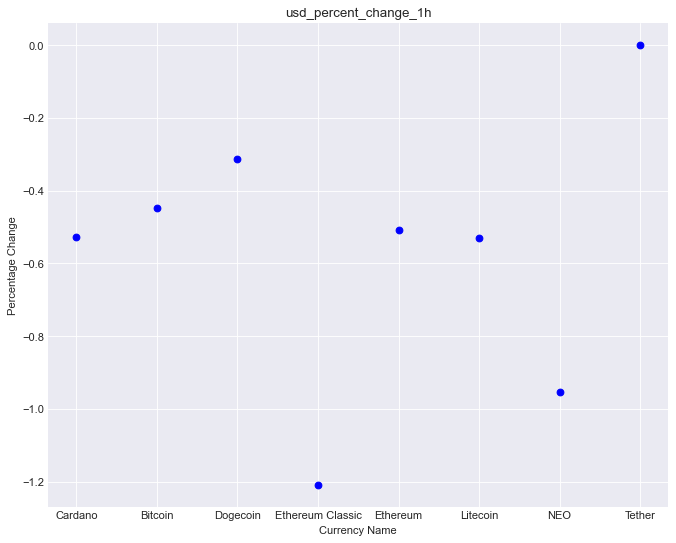

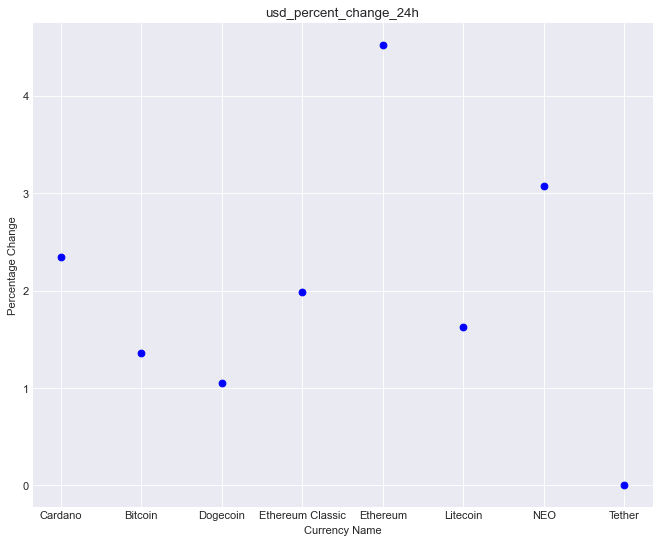

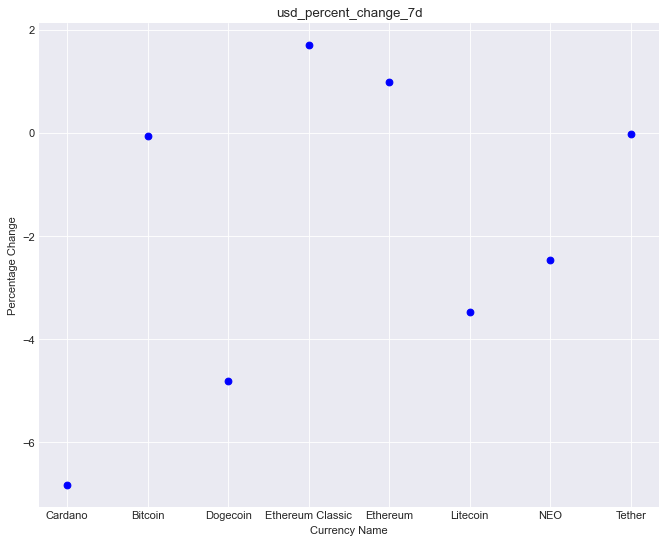

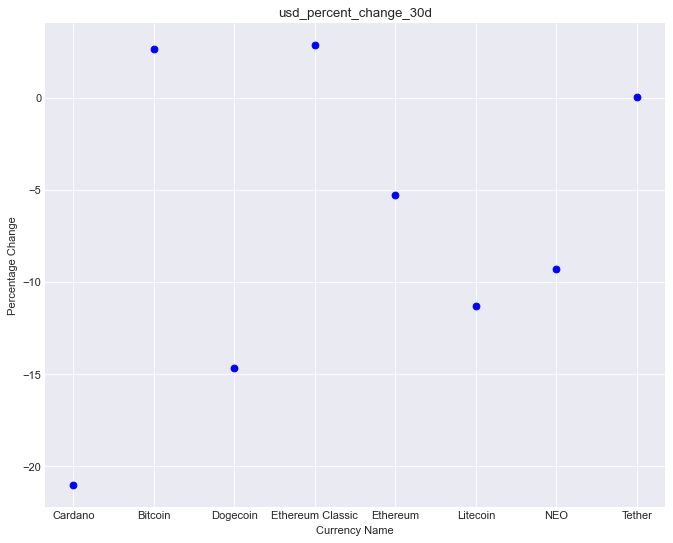

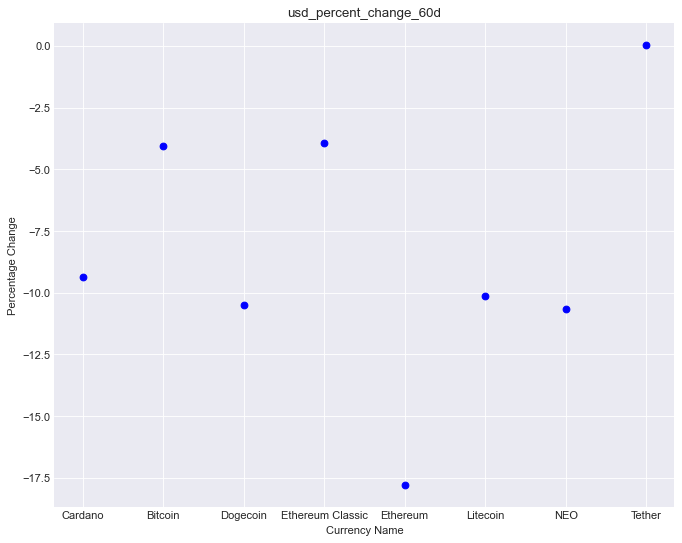

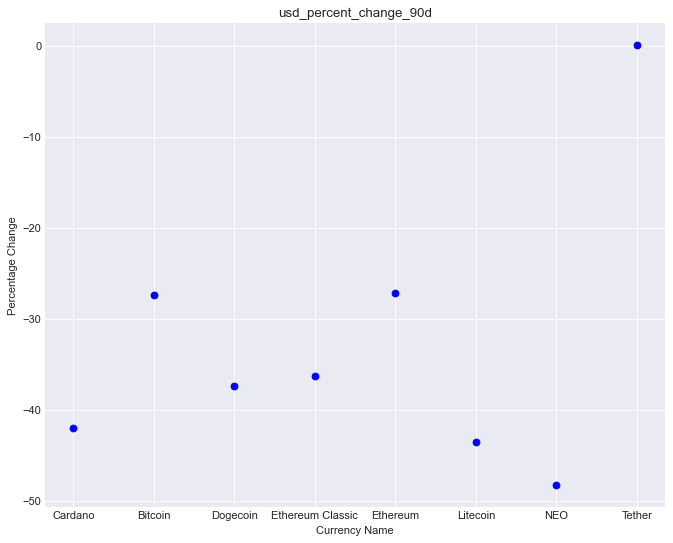

In [145]:
# Plotting scatter plot for all the above columns taken into consideration

for col in list(crypto_sub_df.columns):
    if col not in ('Symbol','Currency_Name'):
        plt.figure(figsize=(10, 8), dpi=80)
        plt.scatter(crypto_sub_df['Currency_Name'], crypto_sub_df[col],c='blue')
        plt.xlabel('Currency Name', fontsize=10)
        plt.ylabel('Percentage Change', fontsize=10)
        plt.title(col)
        #crypto_sub_df.plot.scatter(x = 'Currency_Name', y = col)

####

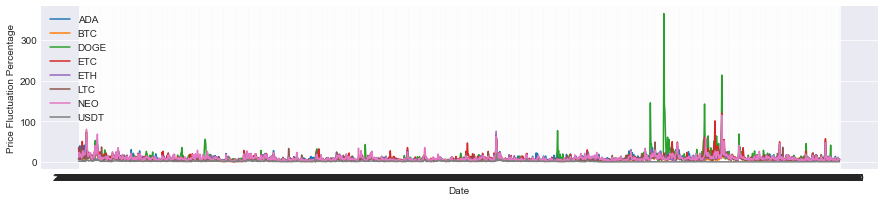

In [123]:
# Line Chart
# Creating the line chart for price fluctuation percentage for all the Digital Currencies and Plot the individual lines with custom colors, styles, and widths

warnings.filterwarnings("ignore")
fig,ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)

for name in crypto:
    ax.plot(crypto_df[crypto_df.Symbol == name].Trading_date, crypto_df[crypto_df.Symbol == name].price_fluctuation_day, label=name)

ax.set_xlabel("Date")
ax.set_ylabel("Price Fluctuation Percentage")
ax.legend(loc='upper left')

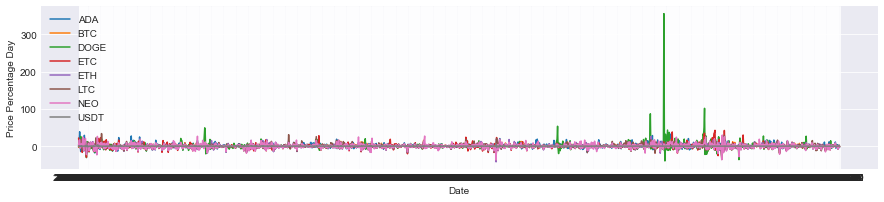

In [124]:
# Creating the line chart for price percentage day for all the Digital Currencies

warnings.filterwarnings("ignore")
fig,ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)

for name in crypto:
    ax.plot(crypto_df[crypto_df.Symbol == name].Trading_date, crypto_df[crypto_df.Symbol == name].price_percent_day, label=name)

ax.set_xlabel("Date")
ax.set_ylabel("Price Percentage Day")
ax.legend(loc='upper left')

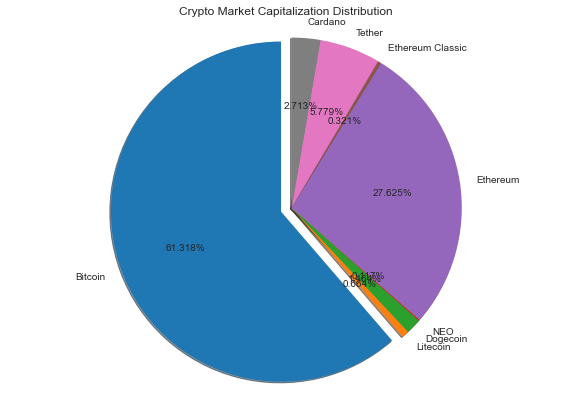

In [179]:
# Pie Chart
# Based on the dataset created for web and api, we will plot pie chart total market capitalization for all the crypto currencies. and also  Removing null values we see only 8 records present in crypto_price_df 

fig1, ax1 = plt.subplots(figsize =(10, 7))
ax1.pie(crypto_price_df['usd_market_cap'], explode=[0.2,0,0,0,0,0,0,0], labels=crypto_price_df['Currency_Name'], autopct='%1.3f%%',
        shadow=True, startangle=90,radius=3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Crypto Market Capitalization Distribution')
plt.show()

Text(0.5, 1.0, 'Crypto Market Capitalization')

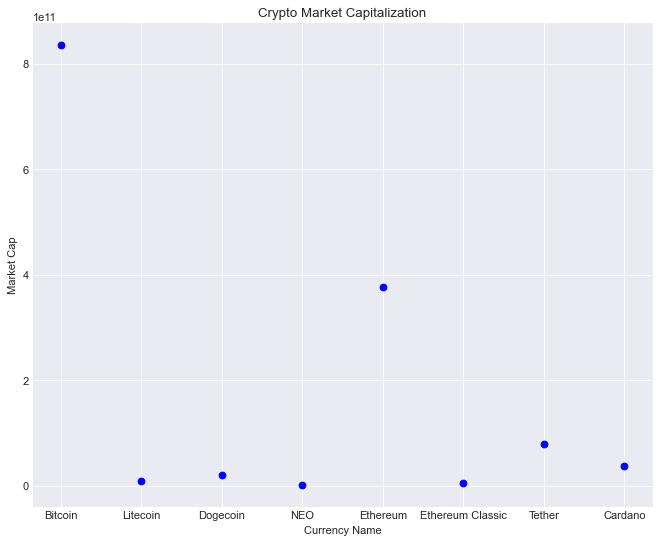

In [180]:
# Showing the above with Scatter Chart

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(crypto_price_df['Currency_Name'], crypto_price_df['usd_market_cap'],c='blue')
plt.xlabel('Currency Name', fontsize=10)
plt.ylabel('Market Cap', fontsize=10)
plt.title('Crypto Market Capitalization')

# Summary and Ethical Implications

'''An “ethical implication” is an ethical consequence of an action. To analyze the “ethical implications” means to look at something from a moral point of view. The concept of “Ethical Implications” is useful for people who work within policy. 
Also the responsibility of an ethical data visualizer is to create the best while doing the least harm. As such, conveying honest and relevant information increases a person’s understanding, and increased understanding and knowledge positively correlates with personal well-being.

This content of the course curriculum has been developed in such a way to learn lot on each milestone.  Again lot of reinforcement of new concepts has been published as a result in each week’s assignment submissions. Learning about Web scraping and its usefulness also how to do the challenging ecommerce business with these kind of conceptual logic was really amazing to learn. 

Thank your professor for setting up the DSC540 course content according to the market trend to learn about   various visualization charts through matplotlib library available in Python was also fascinating.

During the final milestone-5, It was really challenging to create visualizations that have data from more than one source. We had to go through various types of joins available in SQL to get fields from different sources of crypto data in order to make it work cleanly with the SQL database. This was kind of good learning, because it kept some of the other things I've learned fresh, while also learning some of the ins & outs of working with databases.

Based on the analysis of datasets considered for Digital Currencies, I see the price fluctuations for all the times frames (1 hour, 24 hours, 30 days, 90 days and 1 year) are comparatively high which makes investment not feasible to all the investors. The same is depicted in all the visualization charts shown above. The investors having high risk tolerance and appetite only can invest in Digital Currencies assets which is proven with the current market trend after the covid pandemic market situations.  

There were so plenty of tables one for each digital currency in the web page and it was like very difficult in pulling the data using Beautiful soup. I had to come up with a function to loop through the number of tables to process the data for each of the cryptocurrency.'''
